# Resource Timeline Example

For details and documentation see https://www.kalasim.org/resource/#timeline

In [1]:
@file:Repository("*mavenLocal")
@file:DependsOn("com.github.holgerbrandl:kalasim:0.6.96-SNAPSHOT")

//@file:DependsOn("com.github.holgerbrandl:kalasim:0.6.94")
@file:DependsOn("com.github.holgerbrandl:kravis:0.8.1")

import org.kalasim.*
import kravis.*
import  java.util.concurrent.TimeUnit
import java.time.Instant

Setup a very basic simulation where a resource r1 is requested in different ways

In [2]:
val sim = createSimulation{
        tickTransform = OffsetTransform(offset = java.time.Instant.parse("2021-01-01T00:00:00.00Z"), tickUnit = TimeUnit.MINUTES)
}

val r1 = Resource(capacity = 4)
val r2 = Resource(capacity = 4)

object : Component() {
    override fun process() = sequence {
        request(r1)
        hold(100)
        release(r1)
    }
}

object : Component() {
    override fun process() = sequence {
        hold(3)

        request(r2) {
            hold(1)

            request(r1, description = "foo") {
                hold(2)
            }

            hold(1)

             request(r1, description = "bar") {
                hold(2)
             }
        }
    }
}

sim.run(10)

{
  "now": "10.00",
  "num_components": 3,
  "queue": [".1"]
}

Analyze resource activities

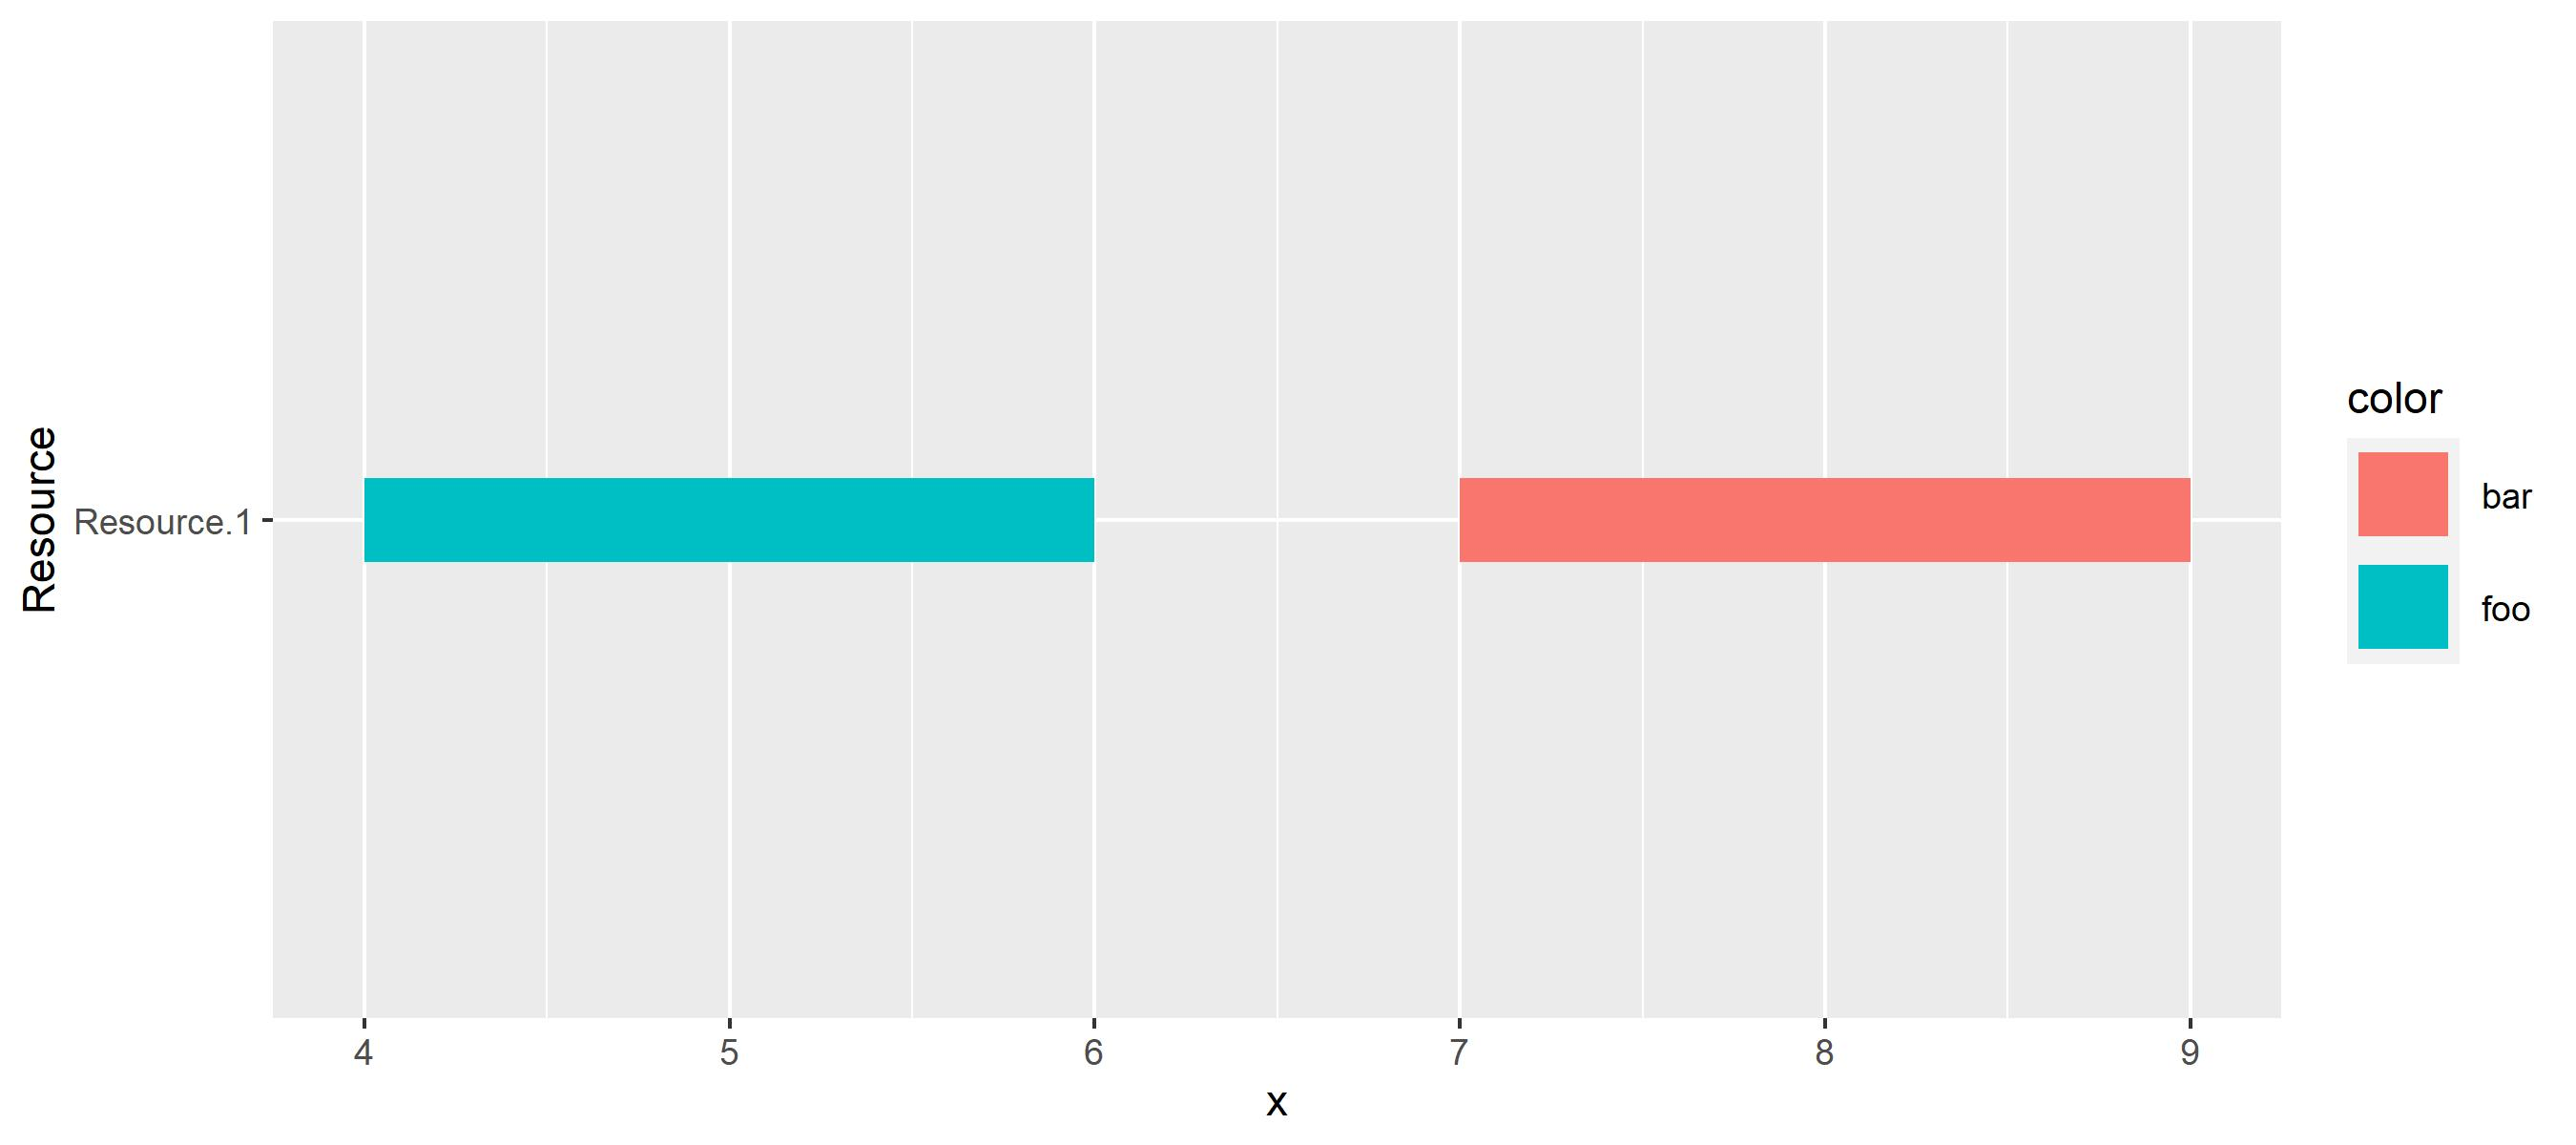

In [3]:
r1.activities
    .plot(y={resource.name},  yend={resource.name},x={start},xend={end}, color={activity})
    .geomSegment(size=10.0).yLabel("Resource")

# Timeline

In [13]:
val rTimeline = r1.timeline

In [14]:
rTimeline.first()

ResourceTimelineSegment(resource=Resource.1, start=.00, end=10.00, duration=10.0, metric=Capacity, value=4.0)

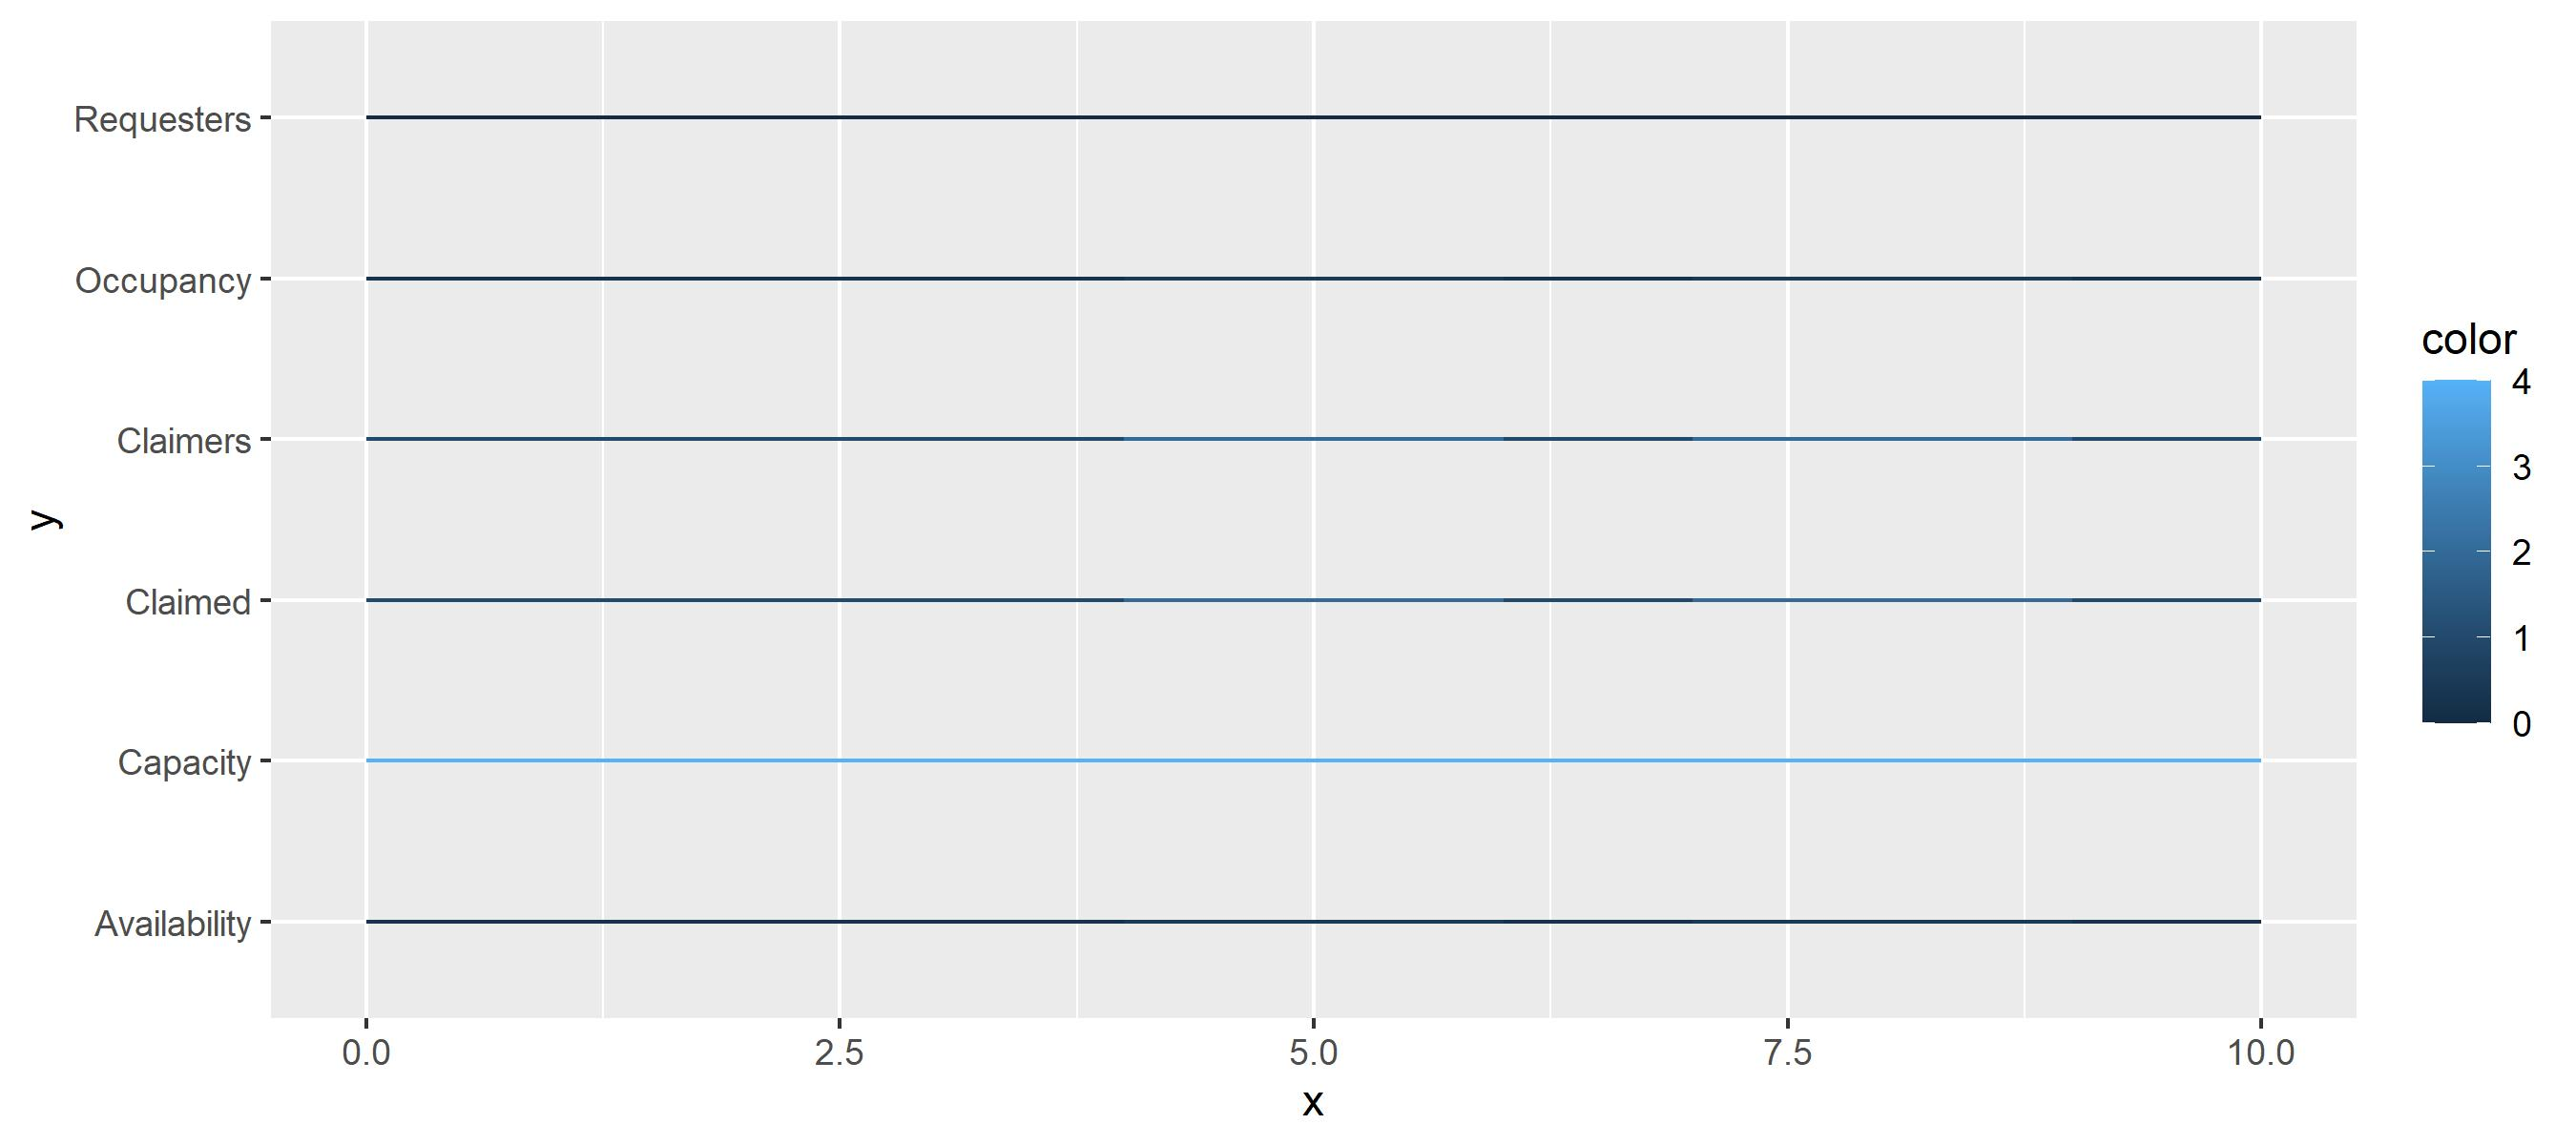

In [15]:
//sleepPatterns.plot(x = { sleep_total }, y = { sleep_cycle }).geomBar()
rTimeline.plot(y={metric}, yend={metric}, x={start}, xend={end }, color={value}).geomSegment()


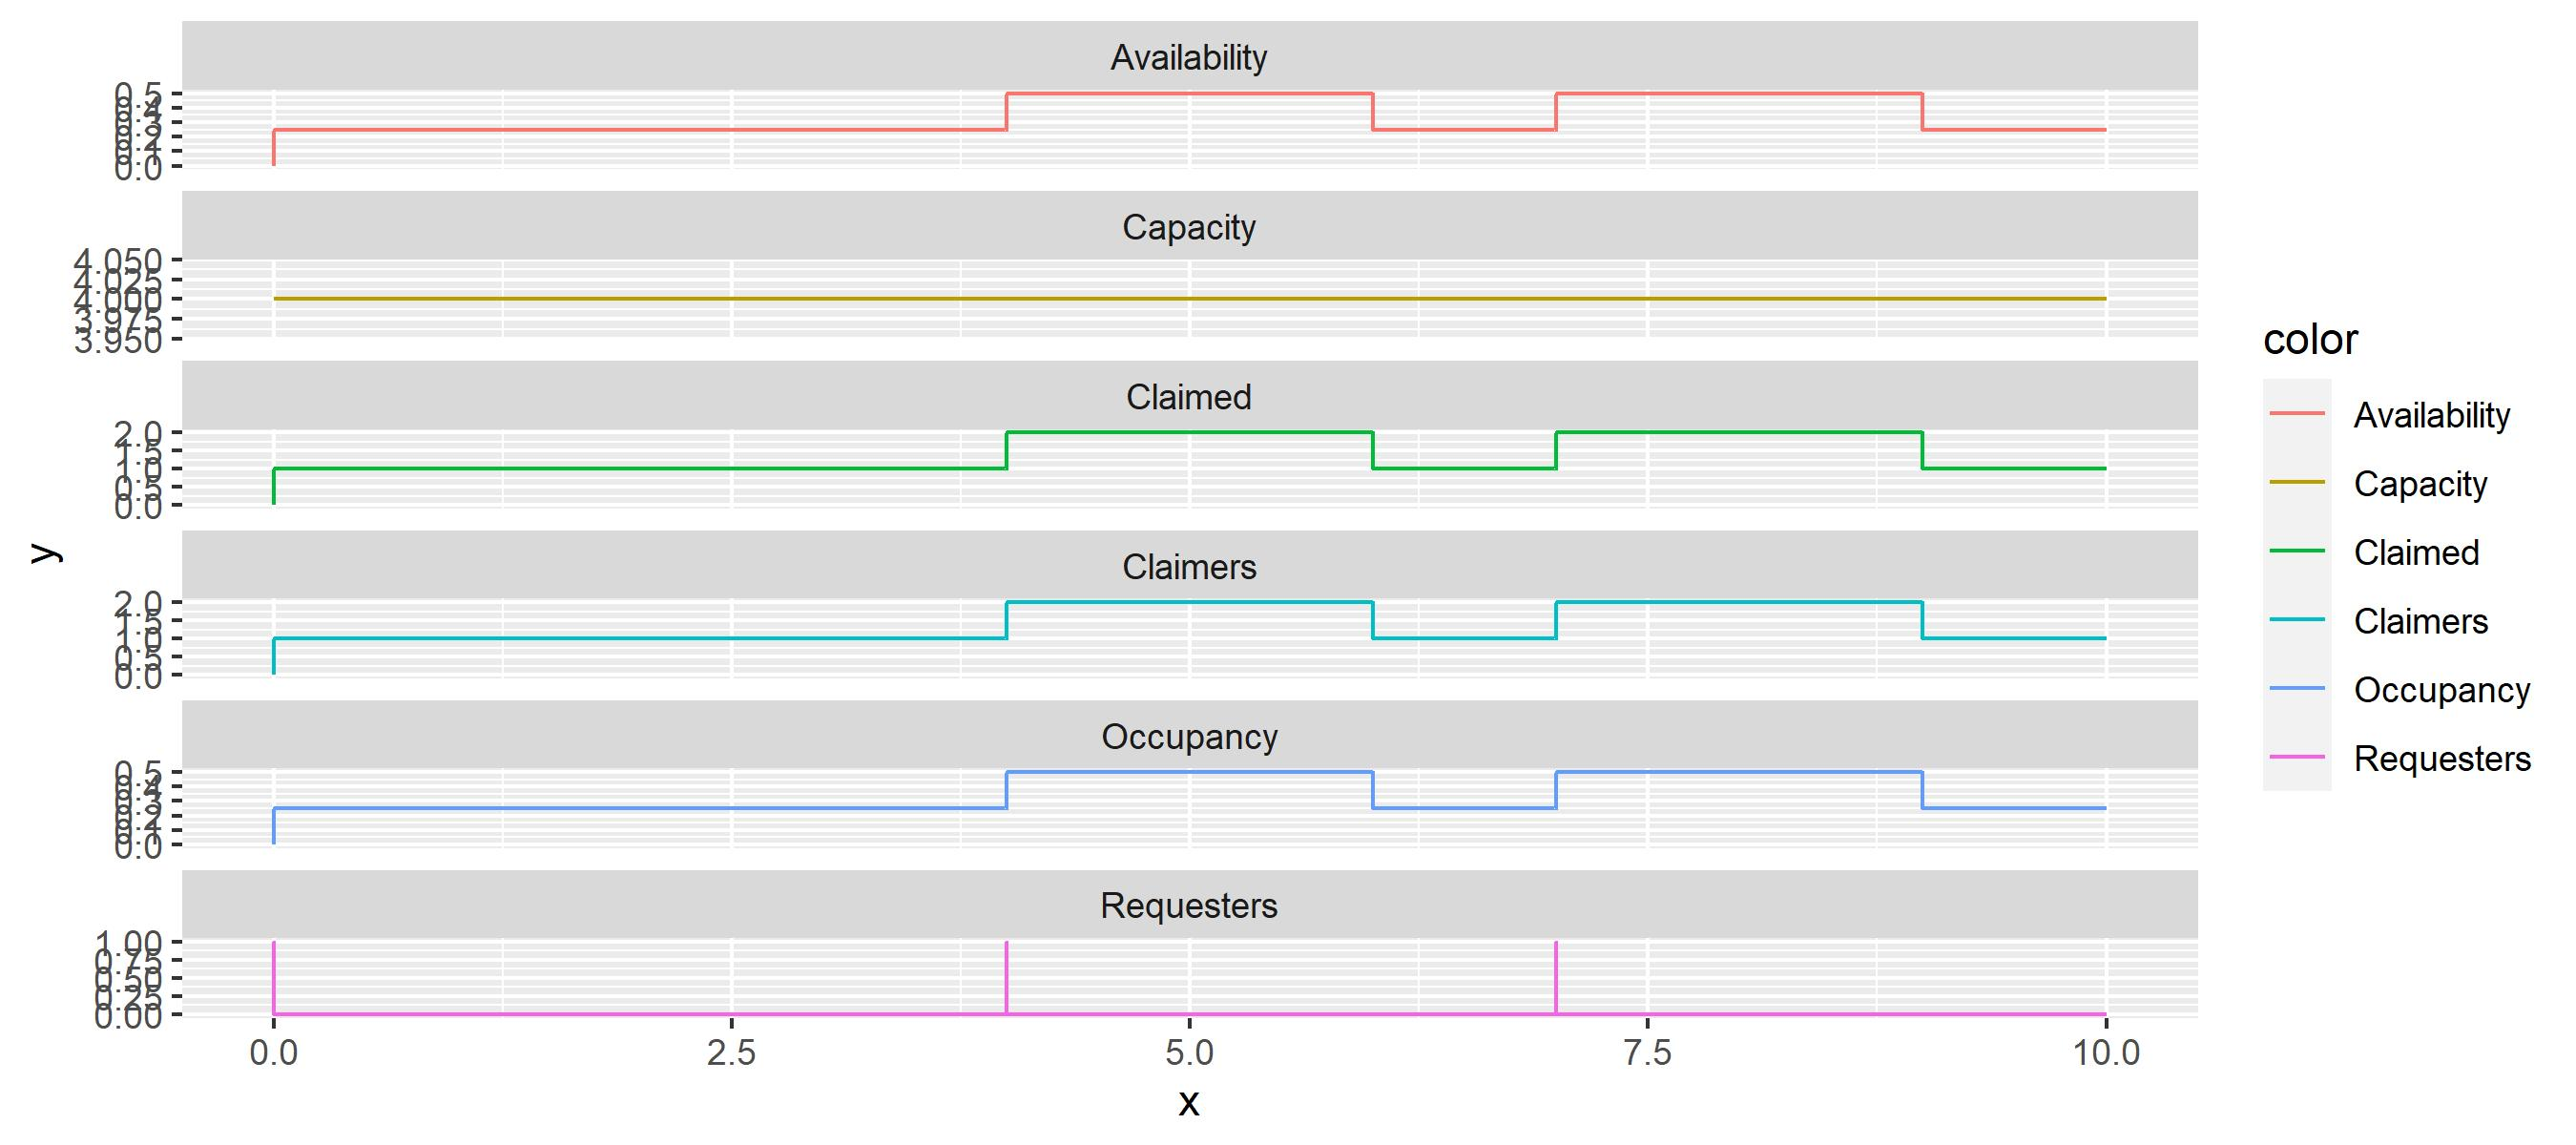

In [22]:
rTimeline.plot(x={start}, y={value} , color={metric}).geomStep().facetWrap("color", ncol=1, scales=FacetScales.free_y)

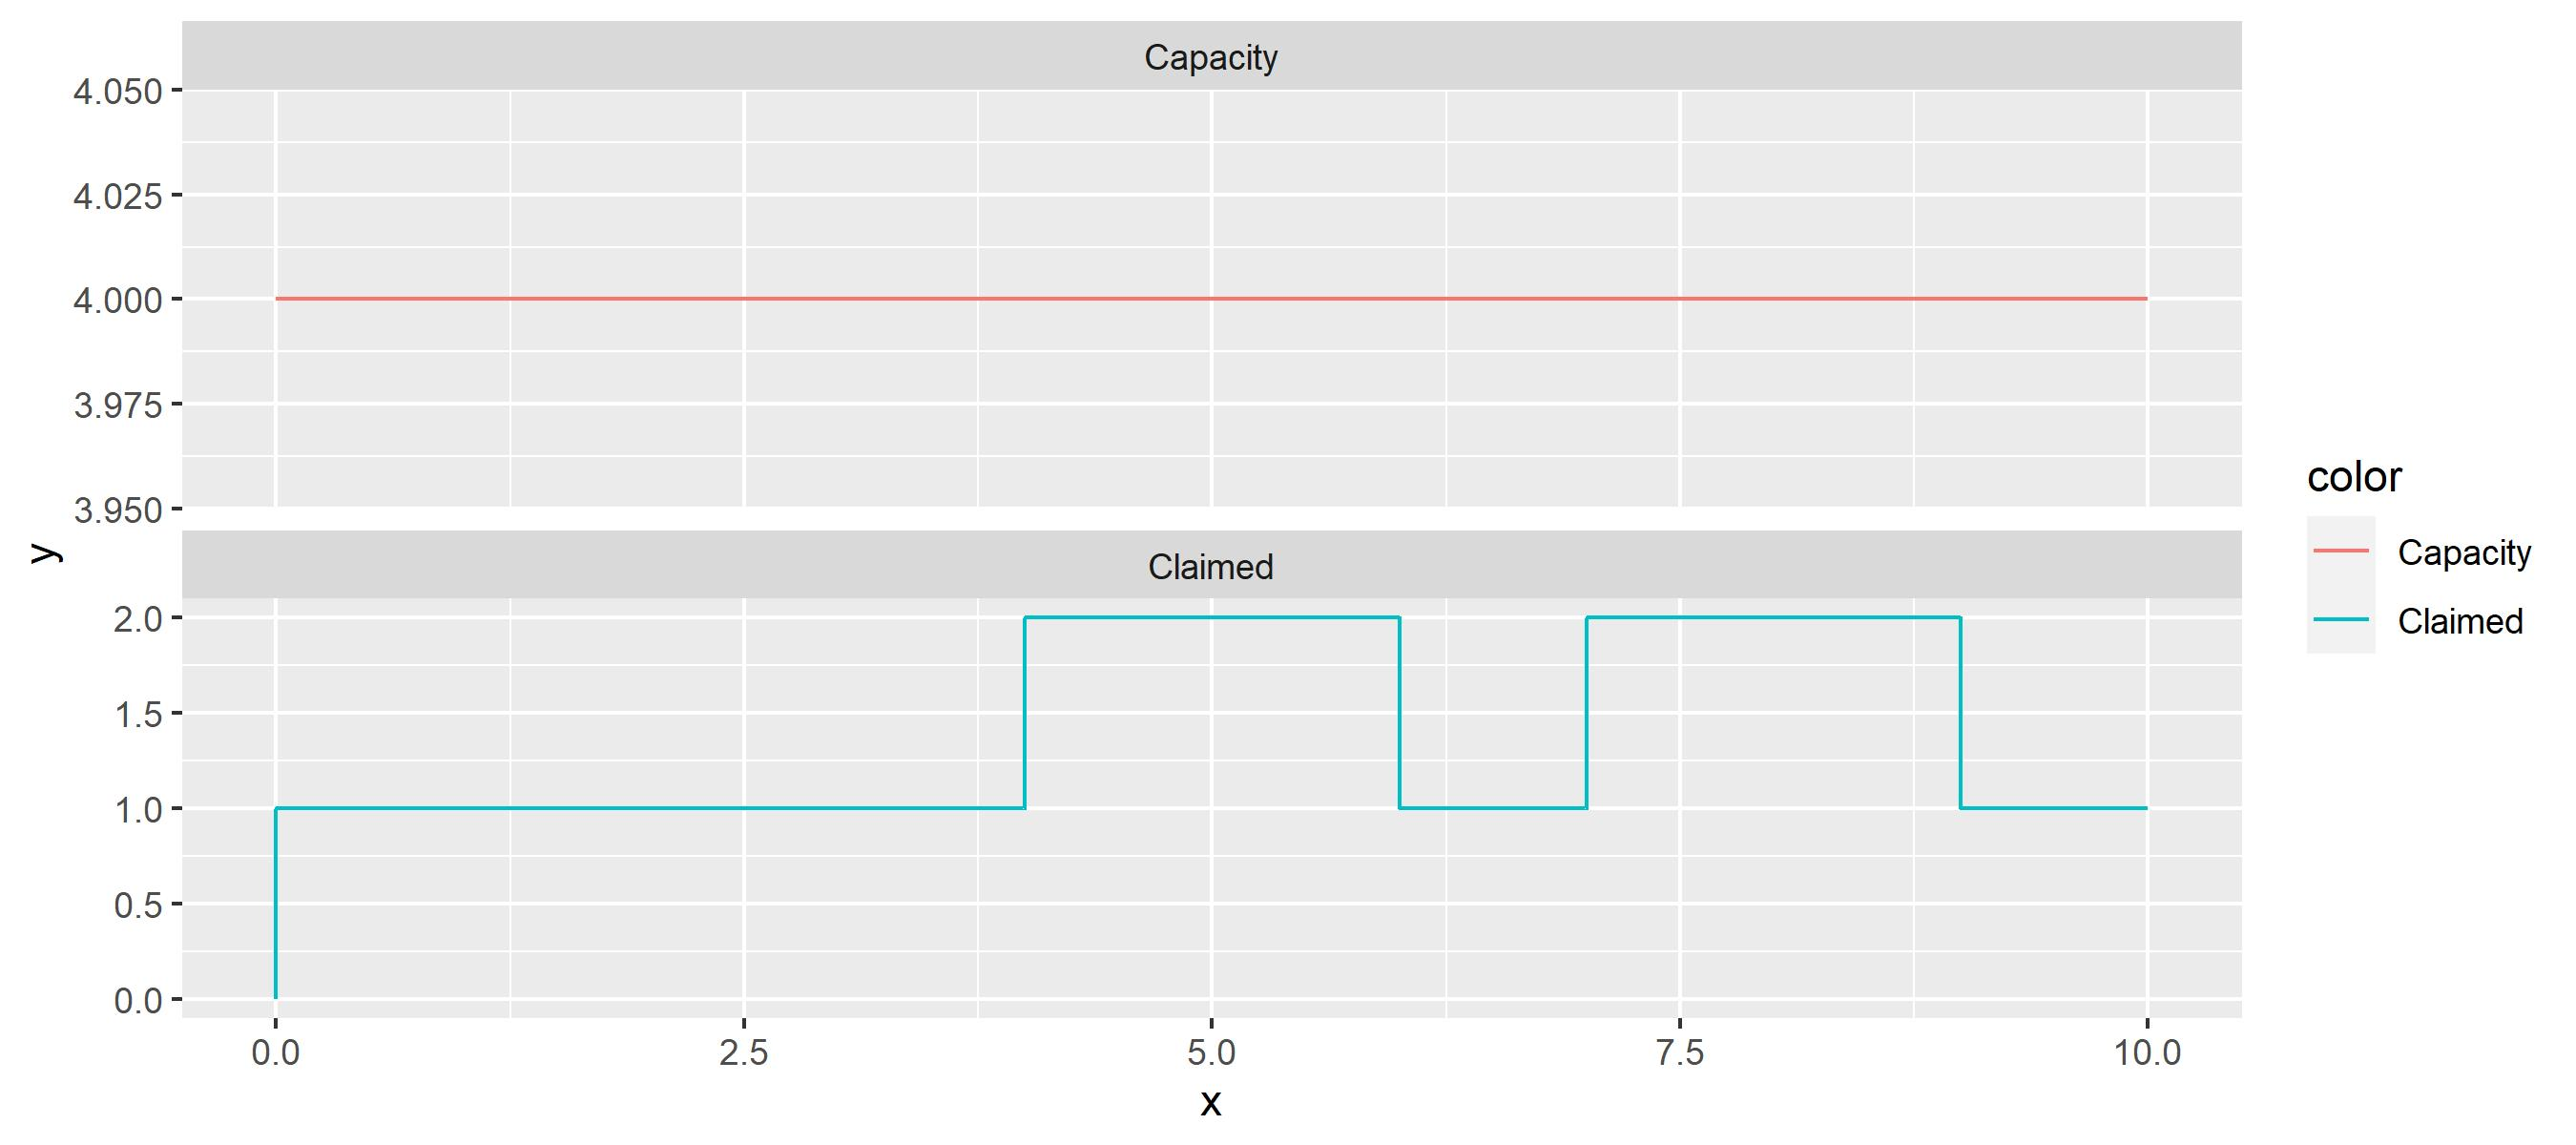

In [24]:
rTimeline
.filter{listOf(ResourceMetric.Capacity, ResourceMetric.Claimed).contains(it.metric)}
.plot(x={start}, y={value} , color={metric}).geomStep().facetWrap("color", ncol=1, scales=FacetScales.free_y)

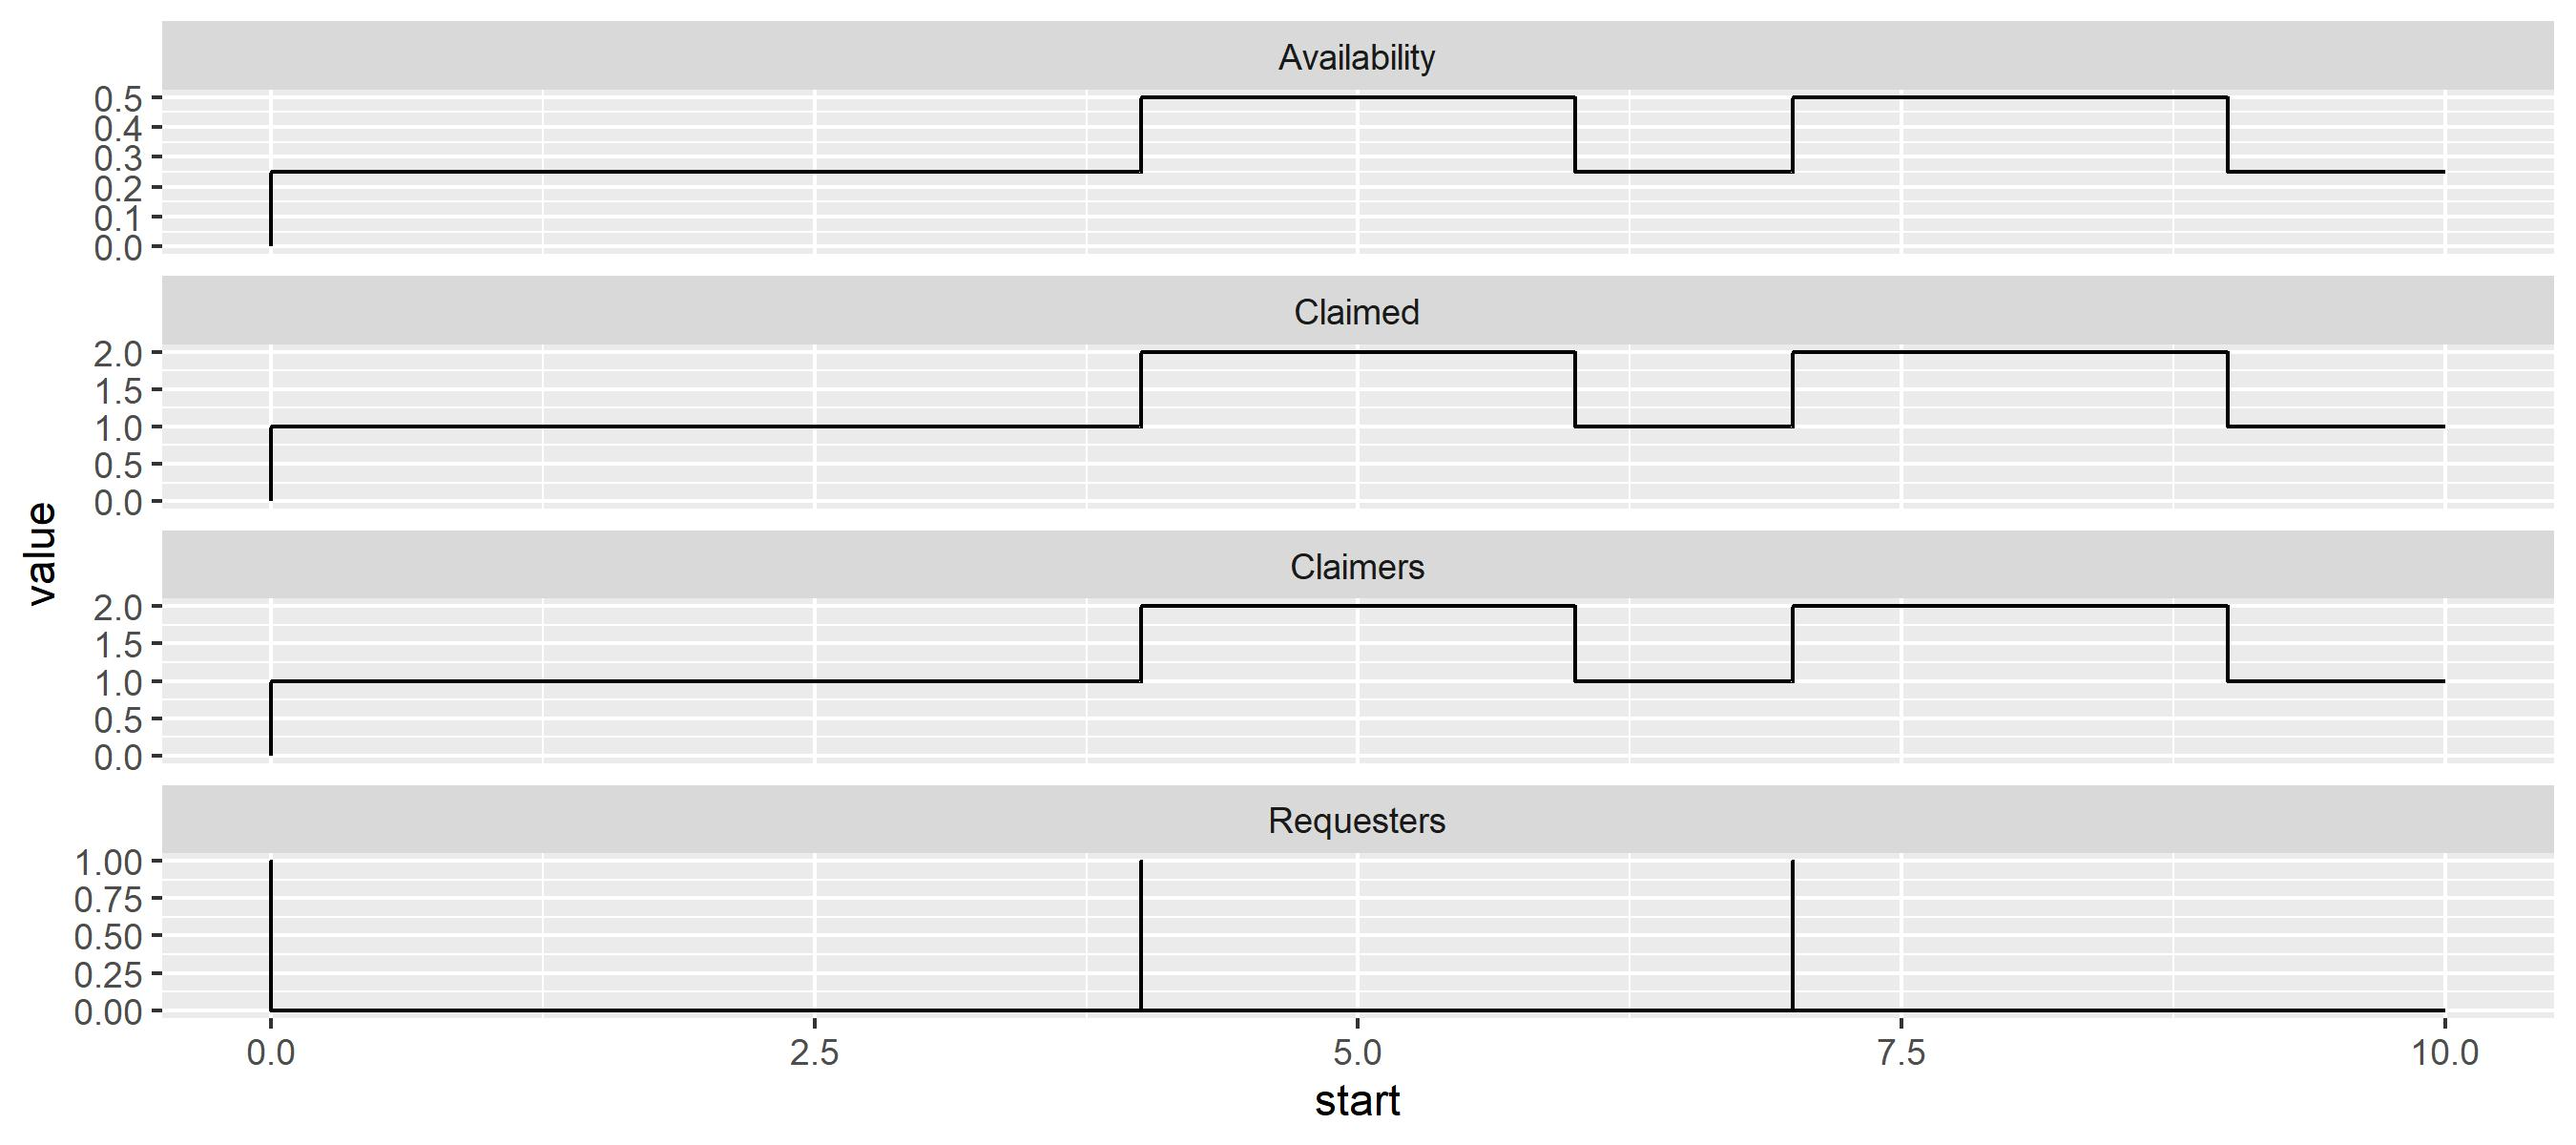

In [28]:
rTimeline
    .filter{it.metric !in listOf(ResourceMetric.Occupancy, ResourceMetric.Capacity)}
    .asDataFrame()
    .plot(x="start", y="value")
    .geomStep()
    .facetWrap("metric", ncol=1, scales=FacetScales.free_y)

In [17]:
r1.capacityMonitor.statsData().asList()

[LevelStateRecord(timestamp=0.0, value=4.0, duration=10.0), LevelStateRecord(timestamp=10.0, value=4.0, duration=null)]

In [18]:
r1.capacityMonitor.statsData().stepFun()

[(0.0, 4.0), (10.0, 4.0)]

In [29]:
rTimeline.filter{listOf(ResourceMetric.Capacity).contains(it.metric)}.asDataFrame()

duration,end,endWT,metric,resource,start,startWT,value
10.0,10.00,2021-01-01T00:10:00Z,Capacity,Resource.1,.00,2021-01-01T00:00:00Z,4.0
null,null,null,Capacity,Resource.1,10.00,2021-01-01T00:10:00Z,4.0


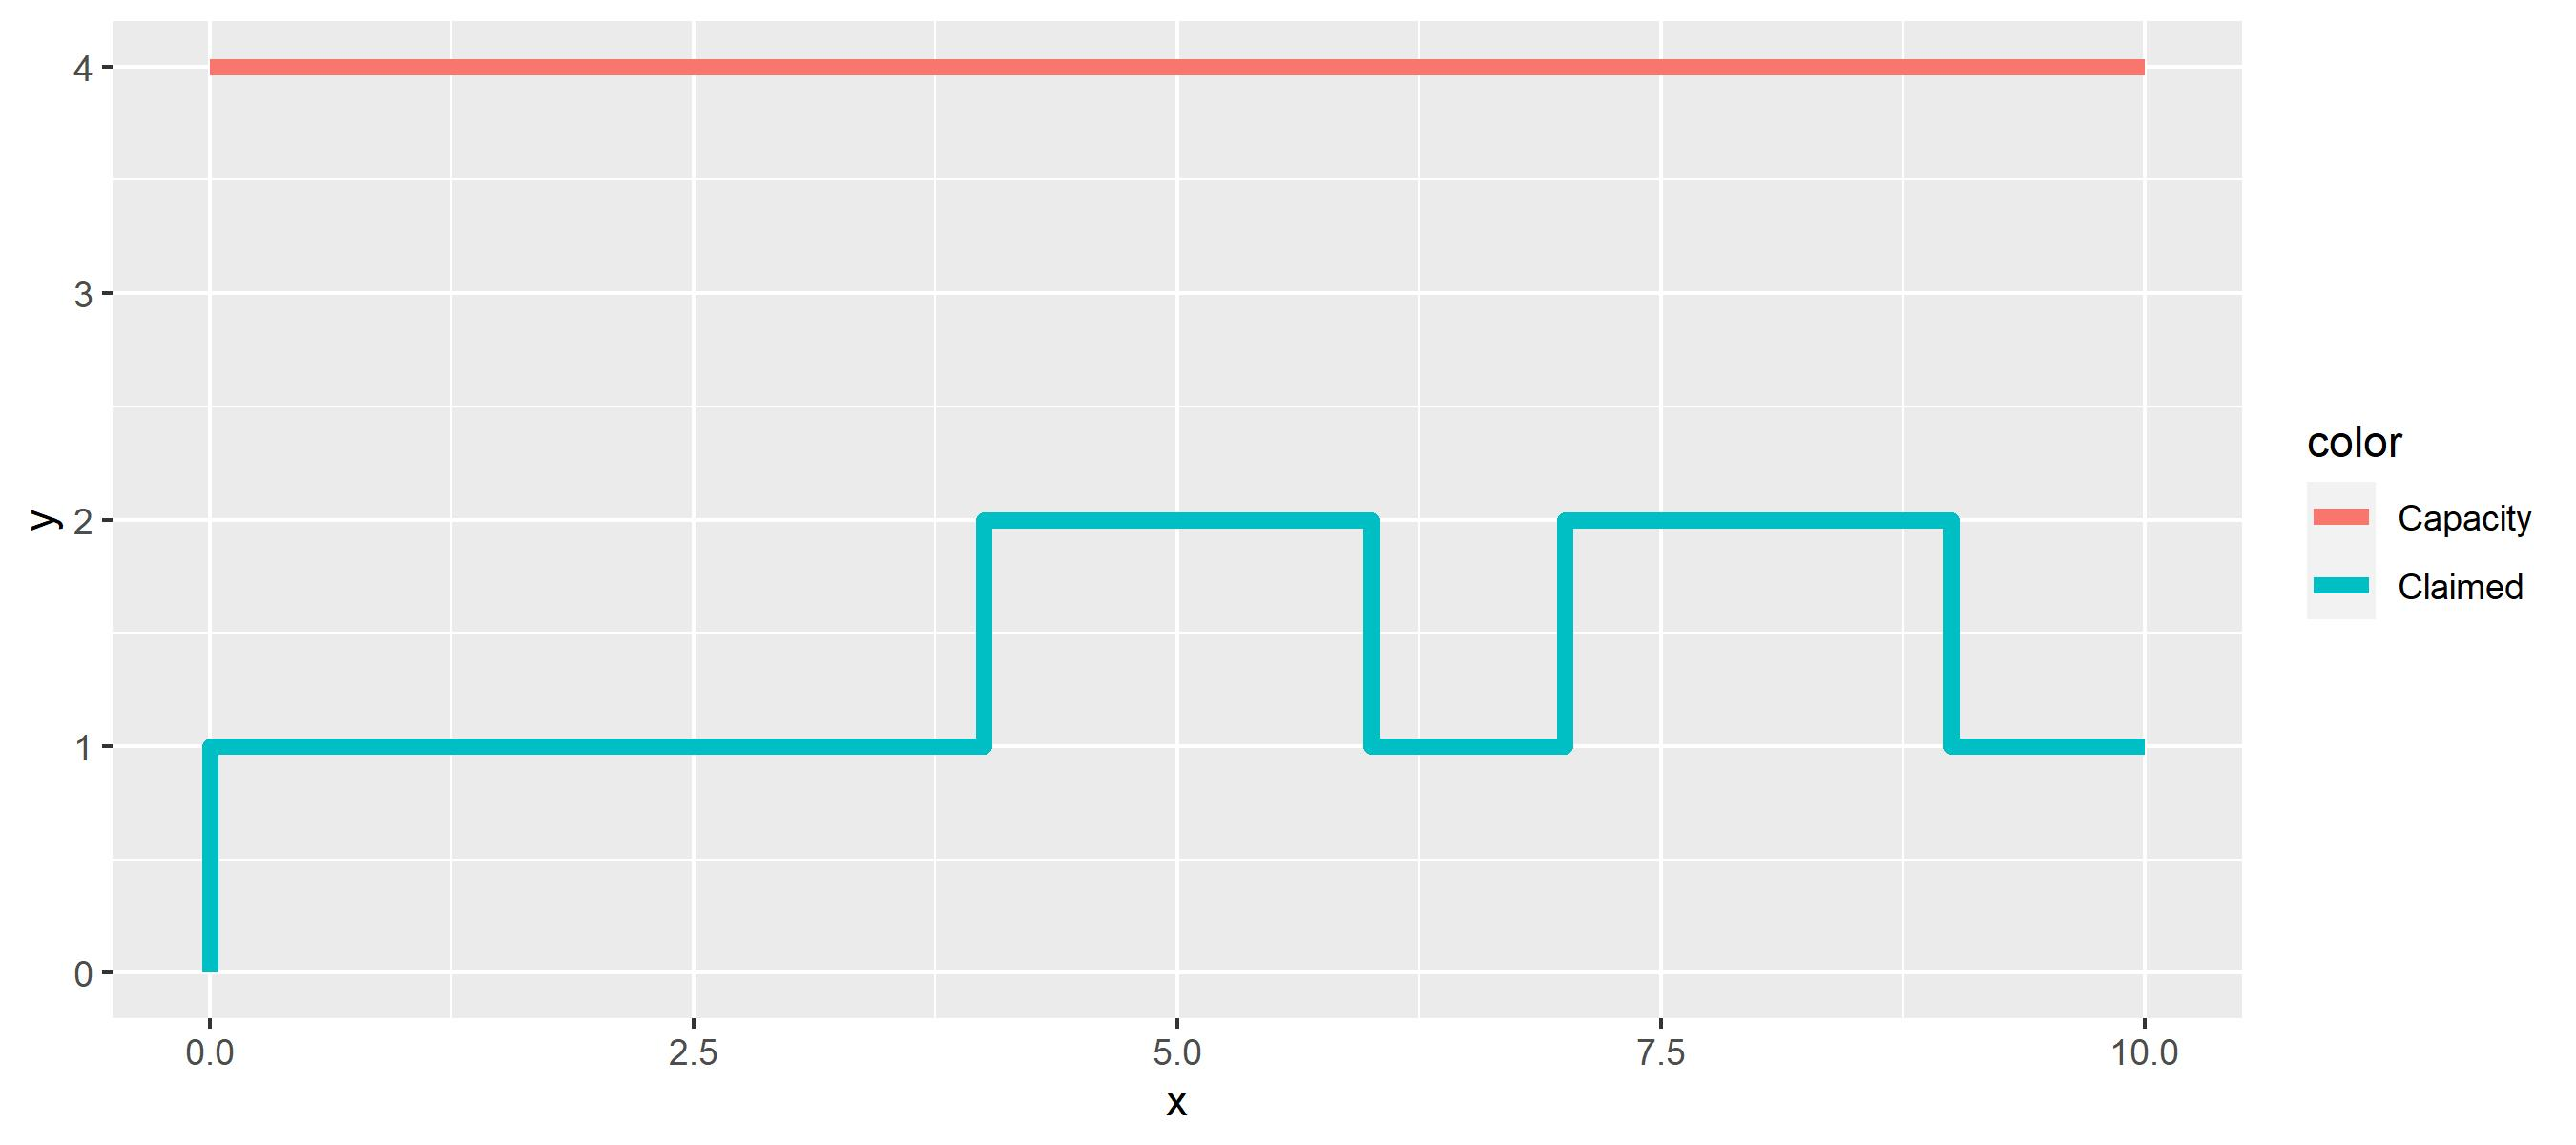

In [30]:
rTimeline.filter{listOf(ResourceMetric.Capacity, ResourceMetric.Claimed).contains(it.metric)}.plot(x={start}, y={value} , color={metric}).geomStep(size=2.0)